# Analysis of Delta Variant

### Group: Group 1

### Team: Avinash Kumar, Vamsi Krishna, Vishwas Narayan

### Project: Digital Tools for Strategic Planning (DOORSTEP)

Import Statements for data analysis using pandas, data manipulation using numpy and plotting the visualizations such as choropleth map, line plots, horizontal barplots using plotly, matplotlib and seaborn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import math
from datetime import datetime
from datetime import date, timedelta
import scipy.stats

import requests
from bs4 import BeautifulSoup
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings('ignore')
#sns.set_style(style='darkgrid')
init_notebook_mode(connected=True)
from pandas.plotting import radviz
import plotly.express as plotlybar
import plotly.express as px

# Exploratory and Data Analysis¶

## Reading the datasets on World Covid data and delta variants.

### World_covid_data

This dataset contains the information of all the countries like total number number of confirmed cases, daily new cases, number of vaccinations etc.

### covid_data_with_all_variants_in_percentages

This dataset has information about the occurence of all the COVID19 variants in percentages. 

### covid_variant

This dataset also includes about information about the occurence of all the COVID19 variants, but in num_sequences.

### gisaid_delta_variant

This dataset is taken from the gissaid website https://www.gisaid.org/hcov19-variants/ which contains the information about the confirmed number of delta variants from all over the world. <b>GISAID is a global science initiative and primary source established in 2008 that provides open-access to genomic data of influenza viruses. and the coronavirus responsible for the COVID-19 pandemic.</b> 

In [2]:
#dataset for whole COVID-19 Pandemic throughout the world

World_covid_data=pd.read_csv('owid-covid-data.csv')
#data for variant specific variants
covid_data_with_all_variants = pd.read_excel("Variant Data 2.xlsx")
covid_variant=pd.read_csv('covid-variants-bar.csv')
gisaid_delta_variant=pd.read_csv('GISAID_updated_delta_variant.csv')
country_iso_codes=pd.read_excel('iso_3digit_alpha_country_codes.xls')
UK_TOTAL_DATA = pd.read_csv('UK_National_Total_COVID_Dataset.csv', index_col='date',parse_dates=True) 
DEVOLVED_NATION_DATA = pd.read_csv('UK_Devolved_Nations_COVID_Dataset.csv', index_col='date',parse_dates=True)
ENGLAND_REGIONS_DATA = pd.read_csv('England_Regions_COVID_Dataset.csv', index_col='date',parse_dates=True)
UK_LOCAL_AUTHORITY_DATA = pd.read_csv('UK_Local_Authority_UTLA_COVID_Dataset.csv', index_col='date',parse_dates=True)
POPULATION_DATA = pd.read_csv('NEW_Official_Population_Data_ONS_mid-2019.csv',index_col='Unnamed: 0')

UK_AND_NATIONS = pd.concat([UK_TOTAL_DATA,DEVOLVED_NATION_DATA])
ENGLAND_AND_REGIONS = pd.concat([DEVOLVED_NATION_DATA[DEVOLVED_NATION_DATA['areaName'] == 'England'],ENGLAND_REGIONS_DATA])
UK_AND_UTLAS = pd.concat([UK_TOTAL_DATA,UK_LOCAL_AUTHORITY_DATA])


# Pre-processing

### Renaming the necessary columns 

All the necessary columns in gisaid_delta_variant dataset have been renamed to Confirmed Delta Cases, Delta Cases in last 4 weeks and Percentage delta cases in last 4 weeks respectively. It improves the reading comprehensibility of the code


In [3]:
gisaid_delta_variant.rename(columns={'Total #Delta G/478K.V1 (B.1.617.2+AY.1+AY.2+AY.3)':'Confirmed Delta Cases',
                                     '#Delta G/478K.V1 (B.1.617.2+AY.1+AY.2+AY.3) in past 4 weeks':'Delta Cases in last 4 weeks',
                                    '%Delta G/478K.V1 (B.1.617.2+AY.1+AY.2+AY.3) in past 4 weeks':'Percentage delta cases in last 4 weeks'},inplace=True)


country_iso_codes.rename(columns={'Definition':'Country'},inplace=True)

### Replacing the comma and converting the confirmed delta cases into numbers

The column "Confirmed Delta Cases" are stored as string in the dataset. Therefore, it is ncessary to convert them into numbers for further data analysis

In [4]:
#gisaid_delta_variant[0:10]
gisaid_delta_variant['Confirmed Delta Cases']=gisaid_delta_variant['Confirmed Delta Cases'].apply(lambda x:x.replace(',',''))
gisaid_delta_variant['Confirmed Delta Cases']=gisaid_delta_variant['Confirmed Delta Cases'].astype(float)
gisaid_delta_variant['Delta Cases in last 4 weeks']=gisaid_delta_variant['Delta Cases in last 4 weeks'].apply(lambda x:x.replace(',',''))
gisaid_delta_variant['Delta Cases in last 4 weeks']=gisaid_delta_variant['Delta Cases in last 4 weeks'].astype(float)


### Renaming the values for some countries

Countries like USA and Russia Federation have been renamed to United States and Russia in order to match their value names in all the datatsets

In [5]:
gisaid_delta_variant=gisaid_delta_variant.replace('USA','United States')
country_iso_codes=country_iso_codes.replace('Russia Federation','Russia')


### Merging gisaid_delta_variant and country_iso_codes

Datasets gisaid_delta_variant and country_iso_codes have been merged based on country names in order to map countries in gisaid_delta_variant datatset with their respective iso_code. The iso_codes are required if we want to visualize countries on worldmap using chlorepleth.

In [6]:
gisaid_delta_variant=gisaid_delta_variant.merge(country_iso_codes,on=['Country'],how='left')
gisaid_delta_variant.rename(columns={'Code Value':'iso_code'},inplace=True)

## Overall impact of delta variant on the world

### Plot for visualizing countries affected by Delta

There are 120 countries where Delta cases are found. It can be observed that United Kingdom is having the highest number of delta variant cases. 


In [7]:
fig = px.choropleth(gisaid_delta_variant, locations="iso_code",
                    color="Confirmed Delta Cases", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(
    
    title_text = 'Countries affected by Delta Variant',
        title_x=0.5,
        showlegend = True,
        legend_title = 'Confirmed Delta Variant cases',
        
)
#figure.show()
fig.show()

### Slicing the datatset to get the top five countries affected by delta variant

In [8]:
Top5_Delta_affected_countries=gisaid_delta_variant.head(5)
Top5_Delta_affected_countries=Top5_Delta_affected_countries[::-1]

### Plot for Visualizing Top 5 Delta Variant affected Countries

It can be observed from the figure that United Kingdom is the most affected country in terms of confirmed number of delta cases, followed by United States and denmark.

In [9]:
fig = px.bar(Top5_Delta_affected_countries, x='Confirmed Delta Cases' , y='Country',text='Confirmed Delta Cases',
             title="Top 5 Delta Variant affected Countries", barmode='group',
             color='Confirmed Delta Cases',  color_continuous_scale='rainbow')
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(title_x=0.5,uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()


## Plot for visualizing top 10 affected countries by delta in last 4 weeks

United kingdom leads the chart in top 10 countries affected in last weeks with 68k delta variant cases. It can be observed from the figure that 8 out of 10 worst affected countries are coming from Europe.

In [10]:
Top_10_affected_in_4_weeks=gisaid_delta_variant.sort_values('Delta Cases in last 4 weeks',ascending=False).sort_values('Delta Cases in last 4 weeks',ascending=False)[0:10]


In [11]:
fig = px.bar(Top_10_affected_in_4_weeks, x='Country' , y='Delta Cases in last 4 weeks',text='Delta Cases in last 4 weeks',
             title="Top 10 Delta Variant affected Countries in last 4 weeks", barmode='group',
             color='Delta Cases in last 4 weeks',  color_continuous_scale='rainbow')
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(title_x=0.5,uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()


# Delta Variant situation in India, United Kingdom and Russia

### Slicing the covid_data_with_all_variants dataset for countries like India, Russia and United Kingdom

The dataset is filtered to contain only the information relevant for the countries in focus, like India, Russia and United Kingdom.

In [12]:
list_variant_countries=['India','Russia','United Kingdom']
covid_data_with_all_variants=covid_data_with_all_variants[covid_data_with_all_variants.location.isin(list_variant_countries)]

### Slicing the covid_data_with_all_variants dataset for variants like Delta, Alpha, Beta and Kappa

In [13]:
list_important_variants=['Delta', 'Alpha', 'Beta','Kappa']
covid_data_with_all_variants=covid_data_with_all_variants[covid_data_with_all_variants.variant.isin(list_important_variants)]

## Propotion of Delta variant cases for UK, India and Russia by the end of April 2021.

### Filtering the dataset for dates for April 2020 to April 2021

In [14]:
pie_chart_data_2020=covid_data_with_all_variants[(covid_data_with_all_variants['date'] > '2020-04-01')
                             & (covid_data_with_all_variants['date'] < '2021-04-30')]
pie_chart_data_2020=pie_chart_data_2020.groupby('variant').aggregate({'num_sequences':'sum'})

### Plot for visualizing Propotion of Delta variant cases for UK, India and Russia by the end of April 2021.

It can be observed from that Alpha variant was dominant till April 2021 with a massive propotion of 96 percent followed by delta with 2 percent.

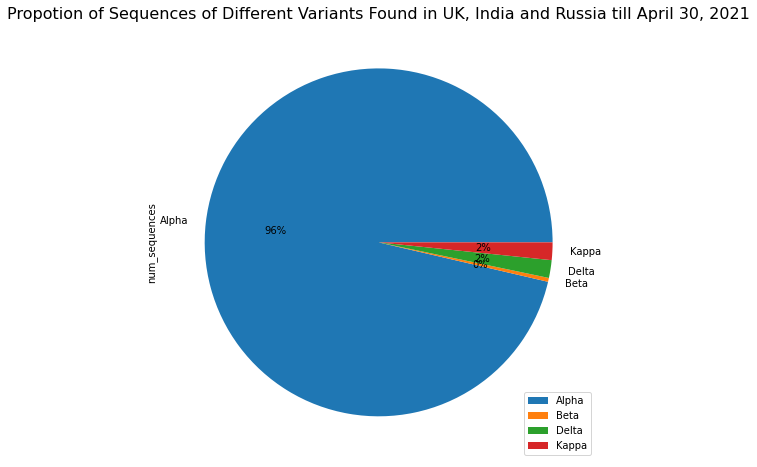

In [15]:
plot =pie_chart_data_2020.plot.pie(y='num_sequences', figsize=(8,8),autopct='%1.0f%%')
plt.legend(loc='lower right')
plt.title("Propotion of Sequences of Different Variants Found in UK, India and Russia till April 30, 2021",fontsize=16)
plt.show()

## Proption of Delta variant cases for UK, India and Russia by the mid of July 2021

### Filtering the dataset for dates for April 2021 to July 2021

In [16]:
pie_chart_data_2021=covid_data_with_all_variants[(covid_data_with_all_variants['date'] > '2020-04-01')
                             & (covid_data_with_all_variants['date'] < '2021-07-15')]
pie_chart_data_2021=pie_chart_data_2021.groupby('variant').aggregate({'num_sequences':'sum'})

### Plot for visualizing Propotion of Delta variant cases for UK, India and Russia by the mid of July 2021.

It can be observed from the figure that there is a significant increase in the propotion of delta variants in last 3 months. Share of delta variant increased from 2 to 36 percent.

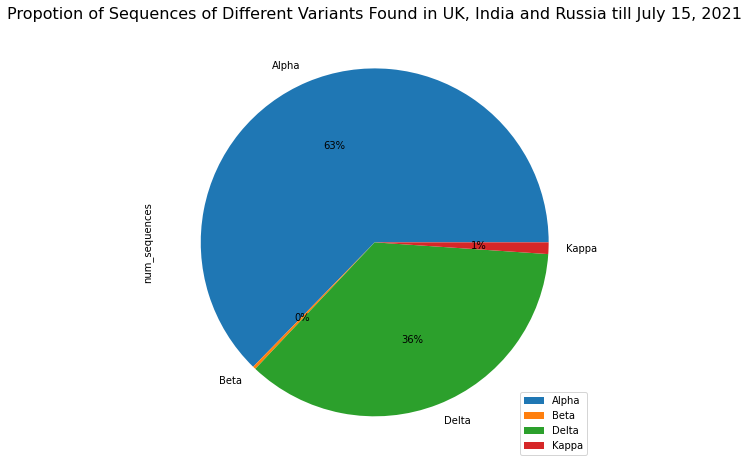

In [17]:
plot =pie_chart_data_2021.plot.pie(y='num_sequences', figsize=(8,8),autopct='%1.0f%%')
plt.legend(loc='lower right')
plt.title("Propotion of Sequences of Different Variants Found in UK, India and Russia till July 15, 2021",fontsize=16)
plt.show()

## Percentage delta sequences in India, Russia, United Kingdom and Germany

### Slicing covid_variant dataset in order to retrieve data for India, United Kingdom, Russia and Germany

In [18]:
delta_India = covid_variant[covid_variant['Entity']=='India']
delta_UK = covid_variant[covid_variant['Entity']=='United Kingdom']
delta_Russia = covid_variant[covid_variant['Entity']=='Russia']
delta_DE= covid_variant[covid_variant['Entity']=='Germany']

### Plot for Visualizing Percentage delta sequences for India, United Kingdom, Russia and Germany

It can be observed from from the suplots that all the countries are showing upward trend in percentage delta sequences.

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2, subplot_titles=("INDIA", "UNITED KINGDOM", "RUSSIA", "GERMANY")
)

fig.add_trace(go.Scatter(x=delta_India['Day'], y=delta_India['Delta']),
              row=1, col=1)

fig.add_trace(go.Scatter(x=delta_UK['Day'], y=delta_UK['Delta']),
              row=1, col=2)

fig.add_trace(go.Scatter(x=delta_Russia['Day'], y=delta_Russia['Delta']),
              row=2, col=1)

fig.add_trace(go.Scatter(x=delta_DE['Day'], y=delta_DE['Delta']),
              row=2, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_xaxes(title_text="Date", row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="% of Delta Sequences", row=1, col=1)
fig.update_yaxes(title_text="% of Delta Sequences", row=1, col=2)
fig.update_yaxes(title_text="% of Delta Sequences", row=2, col=1)
fig.update_yaxes(title_text="% of Delta Sequences", row=2, col=2)


fig.update_layout(height=800, width=1000)
#fig.show()
# Update title and height
#fig.update_layout(title_text="Custo", height=700)

#fig.show()

fig.show()


# India

##  India's Situation due to delta variant

In [20]:
df_India=World_covid_data[World_covid_data['location']=='India']

### Plot for visualizing daily coronavirus cases in India

It can be observed from the figure that there was a significant difference between the daily cases during first and second COVID19 wave. Daily cases during wave reached to 391k whereas the highest number of daily case recorded during first wave was 92k.

In [21]:
fig=px.bar(df_India,x='date',y="new_cases_smoothed",title="Daily Coronavirus Cases in India")
           #labels={'date':'date',
            #      ['Daily New Cases','Daily recoveries']:'Daily cases'})
#fig=px.line(US_daily,x='date',y='Daily recoveries')

#fig.add_trace(line=dict(color=['red','green'],width=4))

fig.update_traces(marker_color='red')

fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Daily Coronavirus Cases",
        title_x=0.5,
        showlegend = True,
        legend_title="",
        width=1000,height=500)

        
fig.show()

### Plot for visualizing daily coronavirus deaths in India

It can be observed from the figure that there was a significant difference between the daily deaths during first and second COVID19 wave. Daily deaths cases during wave reached to 7000 whereas the highest number of daily case recorded during first wave was 2000.

In [22]:
fig = px.line(df_India, x="date", y="new_deaths", title='Deaths during the first and second Covid19 wave in India')
fig.show()


## Reasons for Delta variant surge in India

## <u>Low Vaccination

### Reading data for India's vaccination

In [23]:
Vaccination_data = pd.read_csv('India_Vaccination.csv')
Vaccination_data['Population']=1394457264

### Calculating the percentage of people fully vaccinated and percentage of people given only one dose in India

In [24]:
Vaccination_data['Percentage_people_fully_vaccinted'] = Vaccination_data['people_fully_vaccinated'].apply(lambda x:(x/1394457264)*100)
Vaccination_data['Percentage_people_given_one_dose'] = Vaccination_data['people_vaccinated'].apply(lambda x:(x/1394457264)*100)

### Slicing the dataset for period from January 2021 to April 2021

In [25]:
Vaccination_data['date']=pd.to_datetime(Vaccination_data['date'],format='%Y/%m/%d')
Vaccination_data=Vaccination_data[(Vaccination_data['date']>'2021-01-15')&(Vaccination_data['date']<='2021-04-15')]

### Plot for Visualizing the percentage of people fully vaccinated and percentage of people given only one dose

It is visible from that the vaccination drive in India by the mid of April was very slow. There were only 1 percent people who were fully vaccinated.

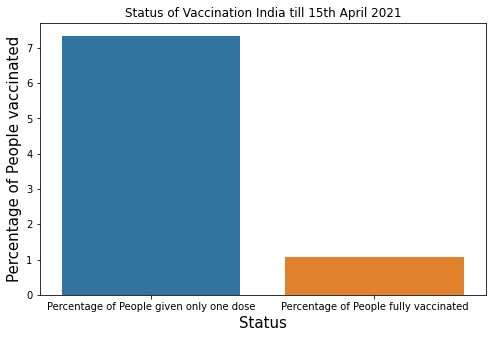

In [26]:
#total_cases=grouped_data["Total Confirmed cases"].sum()
Partially_vaccinated=Vaccination_data["Percentage_people_given_one_dose"].max()
Fully_vaccinated=Vaccination_data["Percentage_people_fully_vaccinted"].max()
y_axis=[Partially_vaccinated,Fully_vaccinated]
x_axis=["Percentage of People given only one dose","Percentage of People fully vaccinated"]
plt.figure(figsize=(8,5))
sns.barplot(x=x_axis, y=y_axis)
#for i,(value,name) in enumerate(zip(x_axis,y_axis)):
 #   plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.title('Status of Vaccination India till 15th April 2021')
plt.xlabel('Status', fontsize=15)
plt.ylabel('Percentage of People vaccinated', fontsize=15)
plt.show()

# United Kingdom

##  United Kingdom Situation due to delta variant

In [27]:
df_UK=World_covid_data[World_covid_data['location']=='United Kingdom']

### Plot for visualizing daily coronavirus cases in United Kingdom

It can be seen from the figure that daily coronavirus cases have been increasing from May 2021. United Kingdom has also been recording delta variants from May 2021 only.

In [28]:
fig=px.bar(df_UK,x='date',y="new_cases_smoothed",title="Daily Coronavirus Cases in UK")
           #labels={'date':'date',
            #      ['Daily New Cases','Daily recoveries']:'Daily cases'})
#fig=px.line(US_daily,x='date',y='Daily recoveries')

#fig.add_trace(line=dict(color=['red','green'],width=4))

fig.update_traces(marker_color='red')

fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Daily Coronavirus Cases",
        title_x=0.5,
        showlegend = True,
        legend_title="",
        width=1000,height=500)

        
fig.show()

In [29]:
df_UK=df_UK[(df_UK['date'] > '2021-03-01')
                             & (df_UK['date'] < '2021-07-15')]

### Plot for visualizing increase in Hospitalized and ICU patient cases in United Kingdom

It can be seen from the figure that number of hospitalization and ICU patients have been increasing in the recent times due to delta surge

In [30]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1, cols=2, subplot_titles=("UNITED KINGDOM - Hospitalized", "UNITED KINGDOM - ICU Patients")
)

fig.add_trace(go.Bar(x=df_UK['date'], y=df_UK['hosp_patients']),
              row=1, col=1)

fig.add_trace(go.Bar(x=df_UK['date'], y=df_UK['icu_patients']),
              row=1, col=2)

#fig.add_trace(go.Scatter(x=delta_Russia['Day'], y=delta_Russia['Delta']),
             # row=2, col=1)

#fig.add_trace(go.Scatter(x=delta_DE['Day'], y=delta_DE['Delta']),
              #row=2, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
#fig.update_xaxes(title_text="Date", row=2, col=1)
#fig.update_xaxes(title_text="Date", row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Hospitalization", row=1, col=1)
fig.update_yaxes(title_text=" ICU Patients", row=1, col=2)
#fig.update_yaxes(title_text="% of Delta Sequences", row=2, col=1)
#fig.update_yaxes(title_text="% of Delta Sequences", row=2, col=2)


fig.update_layout(height=500, width=1000)
#fig.show()
# Update title and height
#fig.update_layout(title_text="Custo", height=700)

#fig.show()

fig.show()


### Add population density data to UK_LOCAL_AUTHORITY_DATA dataframe.


In [31]:
mapping = dict(POPULATION_DATA[['areaCode', 'Population Density (per sq. km)']].values)
UK_LOCAL_AUTHORITY_DATA['Population Density (per sq. km)'] = UK_LOCAL_AUTHORITY_DATA['areaCode'].map(mapping)

### Adding population data to UK_LOCAL_AUTHORITY_DATA dataframe.

In [32]:
MAPPING_POP = dict(POPULATION_DATA[['areaCode', 'Population']].values)
UK_LOCAL_AUTHORITY_DATA['Population'] = UK_LOCAL_AUTHORITY_DATA['areaCode'].map(MAPPING_POP)

### Adding population data to UK_AND_NATIONS dataframe - '.title()' method used to convert country names from all caps so they match with COVID-19 DataFrame

In [33]:
NATION_MAPPING_POP = dict(POPULATION_DATA[['areaName', 'Population']].values)
NATION_MAPPING_POP_fix = dict(zip([i.title() for i in NATION_MAPPING_POP.keys()], [i for i in NATION_MAPPING_POP.values()]))

UK_AND_NATIONS['Population'] = UK_AND_NATIONS['areaName'].map(NATION_MAPPING_POP_fix)

### Calculating 7 day averages for average new cases and deaths

In [34]:
# Calculate 7-day averages for new deaths and new deaths per 100,000 people

SEVEN_DAY_AVERAGES = pd.Series(dtype='float64')

for i in UK_AND_NATIONS['areaName'].unique():
    SEVEN_DAY_AVERAGES = SEVEN_DAY_AVERAGES.append(UK_AND_NATIONS[UK_AND_NATIONS["areaName"] == i]['newDeaths28DaysByDeathDate'].rolling(window=7).mean())
    
UK_AND_NATIONS['New_Deaths_7_day_average'] = SEVEN_DAY_AVERAGES

# Create new 7 day rolling average deaths per 100,000 people

UK_AND_NATIONS['New_Deaths_7_day_average_per_100,000'] = (UK_AND_NATIONS['New_Deaths_7_day_average']*100000/
                                                                   UK_AND_NATIONS['Population'])

# Calculate 7-day averages for new cases 

AVERAGES_CASES = pd.Series(dtype='float64')

for i in UK_AND_NATIONS['areaName'].unique():
    AVERAGES_CASES = AVERAGES_CASES.append(UK_AND_NATIONS[UK_AND_NATIONS["areaName"] == i]['newCasesByPublishDate'].rolling(window=7).mean())
    
UK_AND_NATIONS['New_Cases_7_day_average'] = AVERAGES_CASES


# Create %population first-dose vaccinated

UK_AND_NATIONS['People_Vaccinated_First_Dose_Percent'] = UK_AND_NATIONS['cumPeopleVaccinatedFirstDoseByPublishDate']*100/UK_AND_NATIONS['Population'].fillna(0)

In [35]:
SEVEN_DAY_AVERAGES = pd.Series(dtype='float64')

for i in UK_LOCAL_AUTHORITY_DATA['areaName'].unique():
    SEVEN_DAY_AVERAGES = SEVEN_DAY_AVERAGES.append(UK_LOCAL_AUTHORITY_DATA[UK_LOCAL_AUTHORITY_DATA["areaName"] == i]['newDeaths28DaysByDeathDate'].rolling(window=7).mean())
    
UK_LOCAL_AUTHORITY_DATA['New_Deaths_7_day_average'] = SEVEN_DAY_AVERAGES

### Create new 7 day rolling average deaths per 100,000 people


In [36]:

UK_LOCAL_AUTHORITY_DATA['New_Deaths_7_day_average_per_100,000'] = (UK_LOCAL_AUTHORITY_DATA['New_Deaths_7_day_average']*100000/
                                                                   UK_LOCAL_AUTHORITY_DATA['Population'])

### Set-up DF for boroughs bordering Bolton since 1st May


In [37]:
UK_LOCAL_AUTHORITY_DATA['New_Cases_per_100k'] = UK_LOCAL_AUTHORITY_DATA['newCasesByPublishDate']*100000/UK_LOCAL_AUTHORITY_DATA['Population']

bolton_neighbours = ['Bolton', 'Blackburn with Darwen', 'Wigan', 'Salford', 'Bury','Lancashire']

BOLTON_NEIGHBOURS_SINCE_MAY = UK_LOCAL_AUTHORITY_DATA[UK_LOCAL_AUTHORITY_DATA["areaName"].isin(bolton_neighbours)].loc['2021-05-01':UK_AND_NATIONS.index[-4].strftime("%Y-%m-%d")]

### Plot for visualizing New deaths per 100,000 people (7-day average)

It is observable from the figure that most of the regions in United Kingdom started showing increase in new deaths after the delta surge in UK

<function matplotlib.pyplot.show(close=None, block=None)>

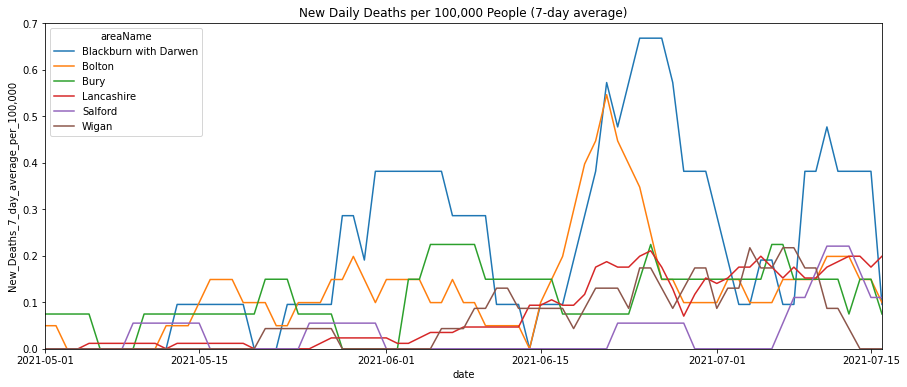

In [38]:
f, axs = plt.subplots(figsize=(15,6))



sns.lineplot(data=BOLTON_NEIGHBOURS_SINCE_MAY,
             x=BOLTON_NEIGHBOURS_SINCE_MAY.index,
             y='New_Deaths_7_day_average_per_100,000',
            hue="areaName",ax=axs)
axs.grid(linestyle=':', linewidth='0.5')
axs.set_title('New Daily Deaths per 100,000 People (7-day average)')
axs.set_xlim(date.fromisoformat('2021-05-01'),UK_AND_NATIONS.index[-4])
axs.set_ylim(0,BOLTON_NEIGHBOURS_SINCE_MAY['New_Deaths_7_day_average_per_100,000'].max()*1.05)
axs.grid(linestyle=':', linewidth='0.5')


plt.savefig('Bolton_Neighbours_Delta_Deaths.jpg', dpi=300)
plt.show

# Russia

### Plot for visualizing daily coronavirus cases in Russia

It can be observed from the figure that daily coronavirus cases have been increasing from June 2021 in Russia. June is also the same time when delta variant cases became more vibrant


In [39]:
df_Russia=World_covid_data[World_covid_data['location']=='Russia']
fig=px.bar(df_Russia,x='date',y="new_cases_smoothed",title="Daily Coronavirus Cases in Russia")
           #labels={'date':'date',
            #      ['Daily New Cases','Daily recoveries']:'Daily cases'})
#fig=px.line(US_daily,x='date',y='Daily recoveries')

#fig.add_trace(line=dict(color=['red','green'],width=4))

fig.update_traces(marker_color='red')

fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Daily Coronavirus Cases",
        title_x=0.5,
        showlegend = True,
        legend_title="",
        width=1000,height=500)

        
fig.show()

### Plot for Visualizing daily deaths in Russia

It is visible from the figure that there has been significant increase in  number of deaths from the month of June.

In [40]:
fig = px.line(df_Russia, x="date", y="new_deaths", title='Deaths during February and July(till date) in Russia')
fig.show()

## Reason for increase in Delta Variant in Russia


## Low Vaccination

### Calculating daily vaccination

In [41]:
Russia_vaccination=pd.read_csv('Russia_Vaccination.csv')
Russia_vaccination['Daily Vaccinations']=Russia_vaccination['total_vaccinations'].diff()
Russia_vaccination

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,Daily Vaccinations
0,Russia,2020-12-15,Sputnik V,http://government.ru/news/41122/,28500,28500,NaN,NaN
1,Russia,2020-12-22,Sputnik V,https://tass.com/society/1238521,52000,52000,NaN,23500.0
2,Russia,2021-01-02,Sputnik V,https://tass.com/society/1241979,800000,800000,NaN,748000.0
3,Russia,2021-01-13,Sputnik V,https://twitter.com/redouad/status/13500305399...,1000000,1000000,NaN,200000.0
4,Russia,2021-03-02,"Sputnik V, EpiVacCorona",https://gogov.ru/articles/covid-v-stats,5249831,4158334,1091497.0,4249831.0
...,...,...,...,...,...,...,...,...
108,Russia,2021-06-27,"Sputnik V, EpiVacCorona",https://gogov.ru/articles/covid-v-stats,38440164,21614318,16825846.0,341951.0
109,Russia,2021-06-28,"Sputnik V, EpiVacCorona",https://gogov.ru/articles/covid-v-stats,38773378,21790363,16983015.0,333214.0
110,Russia,2021-06-29,"Sputnik V, EpiVacCorona",https://gogov.ru/articles/covid-v-stats,39328425,22194585,17133840.0,555047.0
111,Russia,2021-06-30,"Sputnik V, EpiVacCorona",https://gogov.ru/articles/covid-v-stats,40027944,22691596,17336348.0,699519.0


### Plot for Visualizing daily vaccinations in Russia

Russia's vaccination drive became slow from the month of April 2021 as can be seen from the figure.

In [42]:
fig = px.line(Russia_vaccination, x="date", y="Daily Vaccinations", title='Daily Vaccinations in Russia')
#fig = px.line(Vaccination_data, x="date", y="", title='Deaths during February and July(till date) in Russia')

fig.show()

### Renaming column from people_vaccinated to People_given_one_dose for better comprehensibility in the plots

In [43]:
Russia_vaccination.rename(columns={'people_vaccinated':'People_given_one_dose'},inplace=True)

### Converting the date column to datetime format

In [44]:
Russia_vaccination['date']=pd.to_datetime(Russia_vaccination['date'],format='%Y/%m/%d')
#Russia_vaccination[0:60]

### Plot for visualizing People given only one dose Vs People fully vaccinated

It is observed from the figure that number of people who were given one dose or two doses were less till the month of April.

In [45]:
# helper function
def plot_till_date(value1, value2, title, color1, color2) : 
    so_far_dict = {}
    
    for dates in Russia_vaccination.date.unique() : 
        #print(dates)
        so_far_dict[dates], value1_count, value2_count = [], 0, 0
        for i in range(len(Russia_vaccination)): 
            #print(i)
            #print(i," ","Avinash")
            
            if(Russia_vaccination.date.iloc[i] == dates): 
                #print(Delta_India.date.iloc[i])
                value1_count += Russia_vaccination[value1].iloc[i]
                value2_count += Russia_vaccination[value2].iloc[i]
#         if dates not in so_far_dict.keys() : 
        so_far_dict[dates].append(value1_count) 
        so_far_dict[dates].append(value2_count)
    so_far_df = pd.DataFrame.from_dict(so_far_dict, orient = 'index', columns=[value1, value2])
    so_far_df.reset_index(inplace = True)
#     return so_far_df
    so_far_df.sort_values(by='index', inplace = True)
    plot = go.Figure(data=[go.Scatter( 
            x = so_far_df['index'], 
            y = so_far_df[value1], 
            stackgroup='one', 
            name = value1, 
            marker_color= color1), 
                           go.Scatter( 
            x = so_far_df['index'], 
            y = so_far_df[value2], 
            stackgroup='one',
            name = value2, 
            marker_color= color2) 
        ]) 
    plot.update_layout(
    title={
            'text' : title,
            'y':0.95,
            'x':0.5
        },
        xaxis_title="Date",
        yaxis_title='Vaccinations'
    )
    return plot.show()
#country_vaccinations.columns
plot_till_date('people_fully_vaccinated',
               'People_given_one_dose',
               'Partially vaccinated people Vs Fully Vaccinated people', 'Red', 'Orange')